In [77]:
# Simple pacemaker Model:
import numpy as np
import matplotlib.pyplot as plt

vals = {
    '': {
        'starting_membrane_potential': -80.0,
        'input_resistance': 0.1,
        'membrane_time_constant': 30.0,
        'leak_reversal': -60,
        
        'fun_threshold': -50.0,
        'fun_conductance': 10,
        
        'ca_threshold': -50.0,
        'ca_conductance': 10,

        'kdr_threshold': -60.0,
        'kdr_conductance': 40,
        'kdr_delay': 5,
        
        'kir_threshold': -55.0,
        'kir_conductance': 14,

        'na_threshold': -40.0,
        'na_conductance': 10,
        'na_delay': 1
        
    },
}

# Switch channels on(1)/off(0)
fun_switch = 1
ca_switch = 1
kdr_switch = 1
na_switch = 0
kir_switch = 0

   


<class 'SyntaxError'>: invalid syntax. Perhaps you forgot a comma? (<ipython-input-74-ff3f44f6c129>, line 20)

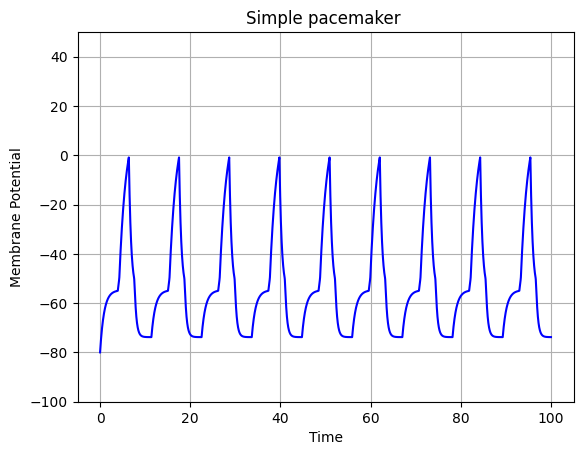

In [76]:
for key, val in vals.items():

  # Initiate parameters
  starting_membrane_potential = val['starting_membrane_potential']
  input_resistance = val['input_resistance']
  membrane_time_constant = val['membrane_time_constant']
  leak_reversal = val['leak_reversal']
  ca_threshold = val['ca_threshold']
  ca_conductance = val['ca_conductance']
  fun_threshold = val['fun_threshold']
  fun_conductance = val['fun_conductance']
  kdr_threshold = val['kdr_threshold']
  kdr_conductance = val['kdr_conductance']
  kdr_delay = val['kdr_delay']
  kir_threshold = val['kir_threshold']
  kir_conductance = val['kir_conductance']
  na_threshold = val['na_threshold']
  na_conductance = val['na_conductance']
  na_delay = val['na_delay']
    
  # Simulation parameters
  duration = 100.0
  time_step = 0.001

  # Initialize variables
  time_values = np.arange(0, duration, time_step)
  membrane_potential_values = np.zeros_like(time_values)
  membrane_potential = starting_membrane_potential
  kdr_reset = 0
  na_reset = 0
  
 
  # Simulate membrane potential
  for i, time in enumerate(time_values):
      
      # Simulate leak current 
      input_current = (membrane_potential - leak_reversal) / input_resistance

      # Simulate funny current
      if fun_switch and membrane_potential < fun_threshold:
          input_current = input_current + (membrane_potential - 0) * fun_conductance

      # Simulate voltage-gated calcium current
      if ca_switch and membrane_potential >= ca_threshold: 
          input_current = input_current + (membrane_potential - 90) * ca_conductance
      
      # Simulate delayed rectifier, including delayed on/offset
      if kdr_switch and membrane_potential >= kdr_threshold and kdr_reset < kdr_delay:
          kdr_reset += time_step
      if kdr_switch and kdr_reset >= kdr_delay and kdr_reset <= 2*kdr_delay:
          kdr_reset += time_step
          input_current = input_current + (membrane_potential + 90) * kdr_conductance
      if kdr_switch and kdr_reset >= 2*kdr_delay:
          kdr_reset = 0

      # Simulate inward rectifier     
      if kir_switch and membrane_potential <= kir_threshold:
          input_current = input_current + (membrane_potential + 90) * kir_conductance

      # Simulate transient voltage-gated sodium current
      if na_switch and membrane_potential >= na_threshold and na_reset < na_delay:
          na_reset += time_step
          input_current = input_current + (membrane_potential - 30) * na_conductance
      if na_switch and membrane_potential >= na_threshold and na_reset >= na_delay:
          na_reset = 0
      if na_switch and membrane_potential < na_threshold:
          na_reset = 0
           
      # Update membrane potential using forward Euler method
      membrane_derivative = - input_current / membrane_time_constant
      membrane_potential += membrane_derivative * time_step

      membrane_potential_values[i] = membrane_potential

  # Plot results
  plt.plot(time_values, membrane_potential_values, color='blue')
  plt.xlabel('Time')
  plt.ylabel('Membrane Potential')
  plt.ylim((-100,50))  
  plt.title(f'Simple pacemaker {key}')
  plt.grid(True)
  plt.show()
